# EDA Project: Analysis of Movie Performance

1. Introduction
- Objective: To explore and analyze the movie dataset, uncovering insights related to movie performance, ratings, and revenue distribution across different categories.

## Data Description

### 1. IMDb Dataset - df_merge/df_merge_directors 

- **Content**: This dataset includes general information about the movie, such as:
    - **title_code**: A tconst, an alphanumeric unique identifier of the title
    - **type**: The type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
    - **primary_title**: The more popular title / the title used by the filmmakers on promotional materials at the point of release
    - **original_title**: Original title, in the original language
    - **is_adult**: 0: non-adult title; 1: adult title
    - **year**: Represents the release year of a title
    - **runtime_minutes**: Primary runtime of the title, in minutes
    - **genres**: Includes up to three genres associated with the title
    - **average_rating**: Weighted average of all the individual user ratings
    - **num_votes**: Number of votes the title has received
    - **directors_code**: Director(s) of the given title
    - **writers_code**: Writer(s) of the given title


### 2. Revenue Dataset - df_rev
- **Content**: This dataset includes Top 20,000 Lifetime Grosses revenue for each movie, such as:
    - **movie_name**: The name of the movie
    - **ww_lifetime_gross_rev**: Worldwide Lifetime Gross revenue
    - **domestic_lifetime_gross_rev**: America Lifetime Gross revenue
    - **domestic_percent**: America Lifetime Gross revenue out of Worldwide Lifetime Gross revenue
    - **foreign_lifetime_gross_rev**: Lifetime Gross revenue except America
    - **foreign_percent**: Gross revenue except America out of Worldwide Lifetime Gross revenue
    - **year**: The year that is on cinema 

## Key Findings
1. Top Directors: Christopher Nolan has the most films (8) in the Top 250.
2. Decade Dominance: The 2010-2020 decade leads with 32 Top 250 movies, while the 1980s and 1990s each contribute 28 films.
3. Revenue Trends: The 2010-2020 decade generated over $3.5 trillion, showing a consistent increase in box office success.
4. Genre Performance: Adventure, Animation, and Comedy top total revenue ($64.4 billion), while Action, Adventure, and Sci-Fi have the highest average revenue per film.
5. Runtime Insights: Longer films have higher average revenues, with medium-length films showing the highest median revenue.
6. Director Revenue: Kelsey Mann leads in average revenue per film; Steven Spielberg has the highest total revenue.
7. Genre Popularity: Drama is the most popular genre, followed by Documentaries and Comedy.


In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
pd.set_option('display.float_format', '{:.2f}'.format)

## Data Preperation

### Data Acquisition:
Scraping a dataset of 20,000 movie revenues online using BeautifulSoup.

In [2]:
# num = range(0, 20000, 200)
# rev = []
# for i in num:
#     urls = [f"https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?area=XWW&offset={i}"]
#     for url in urls:
#         r = requests.get(url)
#         soup = bs(r.content)
#         table = soup.find(attrs = {"id": "table"})
#         rows = table.find_all("tr")[1:]
#         for row in rows:
#             rank =  row.find_all("td")[0].text
#             movie_name =  row.find_all("td")[1].text
#             ww_lifetime_gross_rev = row.find_all("td")[2].text
#             domestic_lifetime_gross_rev = row.find_all("td")[3].text
#             domestic_percent = row.find_all("td")[4].text
#             foreign_lifetime_gross_rev = row.find_all("td")[5].text
#             foreign_percent = row.find_all("td")[6].text
#             year = row.find_all("td")[7].text
#             details = {
#                 "rank": rank,
#                 "movie_name": movie_name,
#                 "ww_lifetime_gross_rev": ww_lifetime_gross_rev,
#                 "domestic_lifetime_gross_rev": domestic_lifetime_gross_rev,
#                 "domestic_percent": domestic_percent,
#                 "foreign_lifetime_gross_rev": foreign_lifetime_gross_rev,
#                 "foreign_percent": foreign_percent,
#                 "year": year
#                 }
#             rev.append(details)

# df_rev = pd.DataFrame(rev)

### IMDB dataset link
https://developer.imdb.com/non-commercial-datasets/

### Merging Datasets:
Join various datasets and clean the data to create a comprehensive DataFrame (df_merge) for analysis.

In [3]:
df_akas = pd.read_csv("title.akas.tsv", sep='\t')
df_basics = pd.read_csv("title.basics.tsv", sep='\t')
df_crews = pd.read_csv("title.crew.tsv", sep='\t')
df_ratings = pd.read_csv("title.ratings.tsv", sep='\t')
df_principals = pd.read_csv("title.principals.tsv", sep='\t')
df_name = pd.read_csv("name.basics.tsv", sep='\t')
df_basics_movie = df_basics[df_basics["titleType"] == "movie"]
df_basics_movie = df_basics_movie.reset_index(drop=True)
df_name_selected = df_name[["nconst", "primaryName"]]


# merge basics with ratings to combine with the ratings
df_merge = pd.merge(df_basics_movie, df_ratings, on = "tconst", how = "left")
df_merge = pd.merge(df_merge, df_crews, on = "tconst", how = "left")
# Split the directors column into a list
df_merge['directors'] = df_merge['directors'].str.split(',')
# Explode the DataFrame to have one row per director
df_merge_directors = df_merge.explode('directors')
# joining base on the director name
df_merge_directors = pd.merge(df_merge_directors, df_name_selected, left_on = "directors", right_on="nconst", how = "left")

col_ls = [
    "title_code",
    "type",
    "primary_title",
    "original_title",
    "is_adult",
    "year",
    "runtime_minutes",
    "genres",
    "average_rating",
    "num_votes",
    "directors_code",
    "writers_code"
]
# drop endYear as it only available for TV series
df_merge.drop(columns=["endYear"], inplace= True)
df_merge.columns = col_ls
df_merge["primary_title"] = df_merge["primary_title"].str.strip()

col_ls = [
    "title_code",
    "type",
    "primary_title",
    "original_title",
    "is_adult",
    "year",
    "runtime_minutes",
    "genres",
    "average_rating",
    "num_votes",
    "directors_code",
    "writers_code",
    "n_const",
    "director_name"
]
df_merge_directors.drop(columns=["endYear"], inplace= True)
df_merge_directors.columns = col_ls
df_merge_directors["primary_title"] = df_merge_directors["primary_title"].str.strip()

df_merge.replace('\\N', np.nan, inplace=True)
df_merge_directors.replace('\\N', np.nan, inplace=True)

df_merge_directors['year'] = pd.to_datetime(df_merge['year'], format='%Y', errors='coerce').dt.year
df_merge['year'] = pd.to_datetime(df_merge['year'], format='%Y', errors='coerce').dt.year

C:\Users\shuto\AppData\Local\Temp\ipykernel_40016\2997561013.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_basics = pd.read_csv("title.basics.tsv", sep='\t')


In [11]:
df_rev = pd.read_csv("df_rev_20000.csv")

def clean_text(text):
    text = text.replace("$", "")
    text = text.replace(",", "")
    text = text.replace("%", "")
    text = text.strip()
    return text

df_rev["domestic_lifetime_gross_rev"] = df_rev["domestic_lifetime_gross_rev"].apply(clean_text)
df_rev["ww_lifetime_gross_rev"] = df_rev["ww_lifetime_gross_rev"].apply(clean_text)
df_rev["domestic_percent"] = df_rev["domestic_percent"].apply(clean_text)
df_rev["foreign_lifetime_gross_rev"] = df_rev["foreign_lifetime_gross_rev"].apply(clean_text)
df_rev["foreign_percent"] = df_rev["foreign_percent"].apply(clean_text)
df_rev["movie_name"] = df_rev["movie_name"].str.strip()

df_rev['year'] = pd.to_datetime(df_rev['year'], format='%Y', errors='coerce').dt.year

df_rev['ww_lifetime_gross_rev'] = pd.to_numeric(df_rev['ww_lifetime_gross_rev'], errors='coerce')
df_rev['domestic_lifetime_gross_rev'] = pd.to_numeric(df_rev['domestic_lifetime_gross_rev'], errors='coerce')
df_rev['foreign_lifetime_gross_rev'] = pd.to_numeric(df_rev['foreign_lifetime_gross_rev'], errors='coerce')

## Top 250 Movies Overview

In [4]:
# Filtering Top Movies: Identify the top 250 movies with more than 50,000 votes.
df_top_250 = df_merge_directors[df_merge_directors['num_votes'] > 50000].sort_values(by =["average_rating", "num_votes"], ascending= False).reset_index(drop= True).head(250)
df_top_250['rank'] = df_top_250.index + 1 
print(df_top_250[["primary_title", "year", "director_name", "average_rating", "num_votes"]].head(10))


                                       primary_title    year  \
0                           The Shawshank Redemption  1973.0   
1                                      The Godfather  1976.0   
2                                    The Dark Knight  2000.0   
3      The Lord of the Rings: The Return of the King  1992.0   
4                                   Schindler's List  1997.0   
5                              The Godfather Part II  1977.0   
6                                       12 Angry Men  1960.0   
7                                       Pulp Fiction  1938.0   
8  The Lord of the Rings: The Fellowship of the Ring  1987.0   
9                                          Inception  2023.0   

          director_name  average_rating  num_votes  
0        Frank Darabont             9.3  2995203.0  
1  Francis Ford Coppola             9.2  2090654.0  
2     Christopher Nolan             9.0  2974670.0  
3         Peter Jackson             9.0  2049977.0  
4      Steven Spielberg       

### Director Analysis:
- Christopher Nolan has the most movies (8) in the Top 250 movies list.

In [5]:
# To observe is there any director that have multiple movies in the top 250 list
# Count occurrences of each director
director_counts = df_top_250['director_name'].value_counts().reset_index()
director_counts.columns = ['Director', 'Count']

# Sort the results by Count
director_counts = director_counts.sort_values(by='Count', ascending=False)

print("Director Counts:")
print(director_counts.head(5).reset_index(drop= True))

Director Counts:
            Director  Count
0  Christopher Nolan      8
1   Steven Spielberg      6
2     Akira Kurosawa      6
3    Stanley Kubrick      6
4    Martin Scorsese      6


### Decade Analysis:
- A frequency table showing the distribution of Top 250 movies by decade.
    - The decade from 2010 to 2020 leads the pack with 32 movies, showing that audiences really embraced the stories and styles of this era.
    - Equal Representation in the 1980s and 1990s. Both the 1980-1990 and 1990-2000 decades each contribute 28 movies to the top 250. It seems that classics from these decades still resonate strongly with viewers, proving their lasting appeal.

In [6]:
# Frequency table
frequency_table = df_top_250.copy()

bins = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]

# Define the corresponding labels for the bins
labels = ['1920-1930', '1930-1940', '1940-1950', '1950-1960', '1960-1970',
          '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020', '2020-2025']
# Create intervals
frequency_table['freq'] = pd.cut(frequency_table['year'], bins=bins, labels=labels, right=False)
freq_table = frequency_table.groupby("freq")['rank'].count().reset_index().rename(columns={'rank': 'count'})

# Sorting descending
freq_table.sort_values(['count'], ascending=False) 

C:\Users\shuto\AppData\Local\Temp\ipykernel_40016\4236172943.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = frequency_table.groupby("freq")['rank'].count().reset_index().rename(columns={'rank': 'count'})


,freq,count
9,2010-2020,32
6,1980-1990,28
7,1990-2000,28
4,1960-1970,24
5,1970-1980,22
8,2000-2010,20
3,1950-1960,17
10,2020-2025,14
1,1930-1940,12
2,1940-1950,10


## Revenue Analysis

In [18]:
df_merge_rev = pd.merge(df_merge, df_rev, left_on = ["primary_title", "year"], right_on = ["movie_name", "year"], how = "inner")
df_merge_rev.head()

,title_code,type,primary_title,original_title,is_adult,year,runtime_minutes,genres,average_rating,num_votes,directors_code,writers_code,rank,movie_name,ww_lifetime_gross_rev,domestic_lifetime_gross_rev,domestic_percent,foreign_lifetime_gross_rev,foreign_percent
0,tt0012190,movie,The Four Horsemen of the Apocalypse,The Four Horsemen of the Apocalypse,0,1921.0,150,"Drama,Romance,War",7.1,3639.0,[nm0002271],"nm0087658,nm0558923","8,598",The Four Horsemen of the Apocalypse,9183673,9183673.0,100,0,-
1,tt0017136,movie,Metropolis,Metropolis,0,1927.0,153,"Drama,Sci-Fi",8.3,191985.0,[nm0000485],"nm0902376,nm0000485","18,960",Metropolis,1350322,1236166.0,91.6,114156,8.4
2,tt0029583,movie,Snow White and the Seven Dwarfs,Snow White and the Seven Dwarfs,0,1937.0,83,"Adventure,Animation,Family",7.6,221777.0,"[nm0183183, nm0359457, nm0414144, nm0604392, n...","nm0342278,nm0342303,nm0780799,nm0187232,nm0257...","1,014",Snow White and the Seven Dwarfs,184960747,184925486.0,100,35261,<0.1
3,tt0031381,movie,Gone with the Wind,Gone with the Wind,0,1939.0,238,"Drama,Romance,War",8.2,342650.0,[nm0281808],"nm0593565,nm0397608,nm0308177,nm0372942,nm0842...",369,Gone with the Wind,402382193,200882193.0,49.9,201500000,50.1
4,tt0032138,movie,The Wizard of Oz,The Wizard of Oz,0,1939.0,102,"Adventure,Family,Fantasy",8.1,444831.0,"[nm0281808, nm0896542]","nm0486538,nm0753249,nm0941138,nm0000875,nm0002...","4,849",The Wizard of Oz,25637669,24668669.0,96.2,969000,3.8


### Decade Revenue Analysis
-  Chart to determine which decade generated the most revenue.
    - The 2010-2020 decade generated over $3.5 trillion, which is more than 1.5 times the revenue of the 2000-2010 decade, indicating a significant rise in blockbuster success.
    - The 2000-2010 decade produced about 1.2 times the revenue of the 1990-2000 decade, reflecting a steady increase in box office performance.
    - The 2000-2010 decade produced about double the revenue of the 1990-2000 decade, reflecting a steady increase in box office performance.
    - Overall, the data reveals a clear trend: each successive decade generally generated more revenue than the previous one, particularly in the last two decades

C:\Users\shuto\AppData\Local\Temp\ipykernel_40016\840193987.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = frequency_table.groupby("freq")['ww_lifetime_gross_rev'].sum().reset_index().rename(columns={'ww_lifetime_gross_rev': 'Worldwide Lifetime Gross Revenue'})


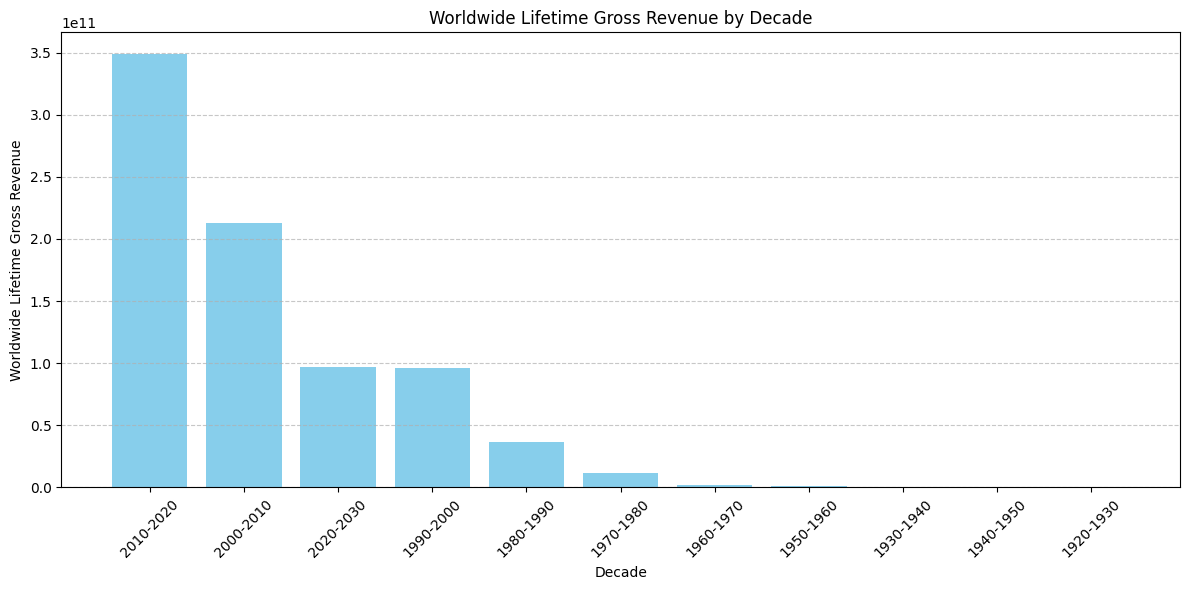

In [19]:
# Frequency table
frequency_table = df_merge_rev.copy()

# Define custom bins for the years
bins = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]

# Define the corresponding labels for the bins
labels = ['1920-1930', '1930-1940', '1940-1950', '1950-1960', '1960-1970',
          '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020', '2020-2030']

# Create intervals
frequency_table['freq'] = pd.cut(frequency_table['year'], bins=bins, labels=labels, right=False)

# Count of each interval
freq_table = frequency_table.groupby("freq")['ww_lifetime_gross_rev'].sum().reset_index().rename(columns={'ww_lifetime_gross_rev': 'Worldwide Lifetime Gross Revenue'})

# Sorting descending by Worldwide Lifetime Gross Revenue
freq_table = freq_table.sort_values(['Worldwide Lifetime Gross Revenue'], ascending=False)

# Sorting descending by Worldwide Lifetime Gross Revenue
freq_table = freq_table.sort_values(['Worldwide Lifetime Gross Revenue'], ascending=False)

# Step to create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(freq_table['freq'], freq_table['Worldwide Lifetime Gross Revenue'], color='skyblue')
plt.title('Worldwide Lifetime Gross Revenue by Decade')
plt.xlabel('Decade')
plt.ylabel('Worldwide Lifetime Gross Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

### Genre Revenue Analysis
- Analyze which genres earn the most revenue.
    - Adventure, Animation, Comedy leads with a total revenue of $64.4 billion, indicating strong audience appeal and successful films. (the second highest number of movies in the list)
    - Action, Adventure, Sci-Fi has a total revenue of $58.2 billion and the highest average revenue per film at $404.5 million. One reason that it has highest average revenue is the number of movies is lesser in this category and it perform pretty equally well, showcasing the success of movies in this category.
    - Genre combinations that include Action and Adventure tend to perform better in both total and average revenue, highlighting their dominance in the film industry. Four of the top revenue-generating genre combinations feature Adventure as a key element

In [22]:
# Revenue by Genre: Group the data by genre to see which genres are the most profitable. Calculating total and average revenue for each genre.
genre_revenue  = df_merge_rev.groupby('genres').agg(
    total_revenue=('ww_lifetime_gross_rev', 'sum'),
    average_revenue=('ww_lifetime_gross_rev', 'mean'),
    count = ('ww_lifetime_gross_rev', 'count')
).sort_values(by='total_revenue', ascending=False).reset_index()

genre_revenue.head(5)

,genres,total_revenue,average_revenue,count
0,"Adventure,Animation,Comedy",64417745820,159845523.13,403
1,"Action,Adventure,Sci-Fi",58248034084,404500236.69,144
2,"Action,Adventure,Fantasy",36875941302,259689727.48,142
3,"Action,Adventure,Comedy",30313456450,116143511.30,261
4,Comedy,26499870329,16089781.62,1647


### Scatter Plots
- Both average rating and runtime have weak correlations with worldwide lifetime gross revenue, indicating that other factors likely influence financial success more significantly.

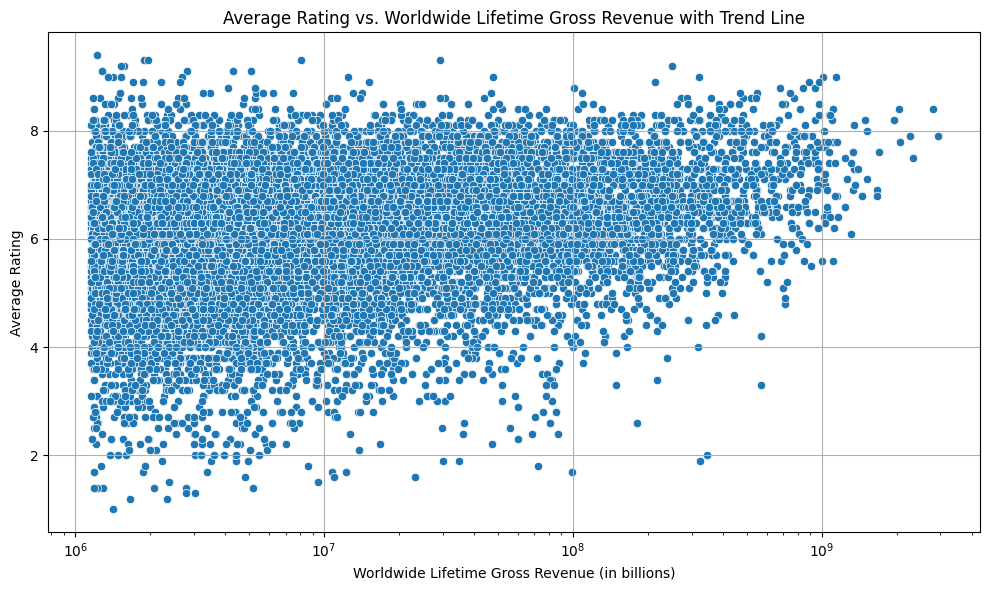

Correlation: 0.18


In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merge_rev, x='ww_lifetime_gross_rev', y='average_rating')
plt.title('Average Rating vs. Worldwide Lifetime Gross Revenue')
plt.xlabel('Worldwide Lifetime Gross Revenue (in billions)')
plt.ylabel('Average Rating')
plt.xscale('log')  # Use log scale for better visualization
plt.grid()


# Show the plot
plt.tight_layout()
plt.show()

# Step 2: Calculate the correlation coefficient
correlation = df_merge_rev[['ww_lifetime_gross_rev', 'average_rating']].corr().iloc[0, 1]

print(f'Correlation: {correlation:.2f}')

Correlation: 0.17


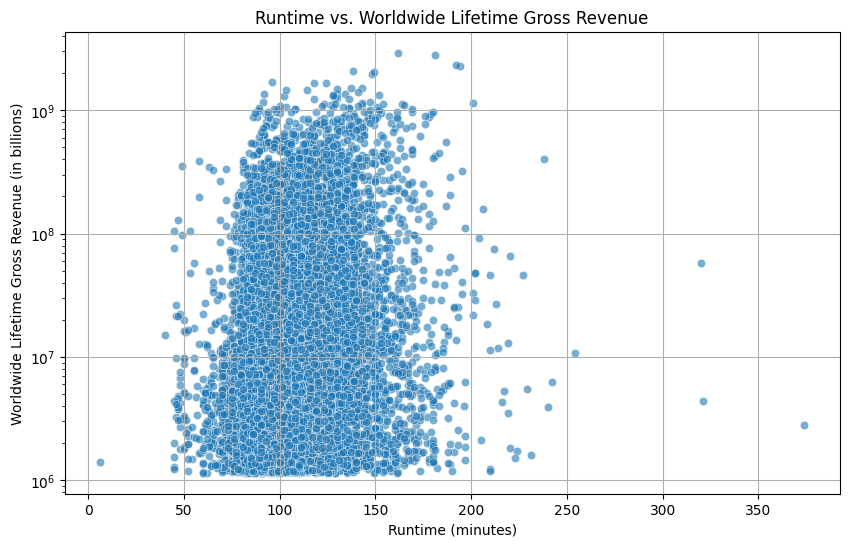

In [24]:
df_merge_rev['runtime_minutes'] = pd.to_numeric(df_merge_rev['runtime_minutes'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merge_rev, x='runtime_minutes', y='ww_lifetime_gross_rev', alpha=0.6)
plt.title('Runtime vs. Worldwide Lifetime Gross Revenue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Worldwide Lifetime Gross Revenue (in billions)')
plt.xscale('linear')  # Use linear scale for runtime
plt.yscale('log')     # Use log scale for revenue
plt.grid()

# Step 2: Calculate the correlation coefficient
correlation = df_merge_rev[['ww_lifetime_gross_rev', 'runtime_minutes']].corr().iloc[0, 1]

print(f'Correlation: {correlation:.2f}')


### Categorization of Movies
- Long movies lead in average revenue, significantly higher than medium and short movies.
- The median revenue shows that medium movies have the highest median at $7,883,486, indicating that while long movies have a higher average, they might also include a few outliers with very high revenues that skew the average. Medium-length films may have a more consistent revenue performance.
- Regarding the movie count, medium movies dominate in quantity, with 15,060 films, indicating a strong production trend in this category. Long movies, while fewer in number, have a higher average revenue, highlighting a potential focus on blockbuster filmmaking.
- The correlation between runtime and average rating is positive, suggesting that longer films may be rated more favorably.

In [26]:
# Categorize Movies by Length: Group movies into categories (e.g., short, medium, long) and analyze average revenues within these groups.
def categorize_length(runtime):
    if runtime < 90:
        return 'short'
    elif 90 <= runtime <= 150:
        return 'medium'
    else:
        return 'long'
    
df_merge_rev['length_cat'] = df_merge_rev['runtime_minutes'].apply(categorize_length)

average_revenue = df_merge_rev.groupby('length_cat')['ww_lifetime_gross_rev'].mean().reset_index()

print(average_revenue)

  length_cat  ww_lifetime_gross_rev
0       long            75667433.27
1     medium            44053442.20
2      short            25387556.97


In [27]:
median_revenue = df_merge_rev.groupby('length_cat')['ww_lifetime_gross_rev'].median().reset_index()
print(median_revenue)

  length_cat  ww_lifetime_gross_rev
0       long             5715460.00
1     medium             7883486.00
2      short             4798761.00


In [28]:
df_merge_rev.groupby('length_cat')['ww_lifetime_gross_rev'].count().reset_index()

,length_cat,ww_lifetime_gross_rev
0,long,1075
1,medium,15060
2,short,2422


In [29]:
df_merge_rev[["movie_name", "runtime_minutes", "ww_lifetime_gross_rev", "length_cat"]].sort_values(by= "ww_lifetime_gross_rev", ascending= False).head(10).reset_index(drop= True)

,movie_name,runtime_minutes,ww_lifetime_gross_rev,length_cat
0,Avatar,162.00,2923706026,long
1,Avengers: Endgame,181.00,2799439100,long
2,Avatar: The Way of Water,192.00,2320250281,long
3,Titanic,194.00,2264750694,long
4,Star Wars: Episode VII - The Force Awakens,138.00,2071310218,medium
5,Avengers: Infinity War,149.00,2052415039,medium
6,Spider-Man: No Way Home,148.00,1952732181,medium
7,Inside Out 2,96.00,1698863816,medium
8,Jurassic World,124.00,1671537444,medium
9,The Lion King,118.00,1662020819,medium


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merge_rev, x='runtime_minutes', y='average_rating', alpha=0.6)
plt.title('Runtime vs. Average Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.grid()

# Step 2: Calculate the correlation coefficient
correlation = df_merge_rev[['runtime_minutes', 'average_rating']].corr().iloc[0, 1]


print(f'Correlation: {correlation:.2f}')

### Director Revenue Analysis:
- Kelsey Mann has the highest average revenue at $1,698,863,816, primarily from "Inside Out 2."
- Steven Spielberg leads with a staggering total revenue of $10,774,058,421 across numerous iconic films
- Anthony Russo and Joe Russo have identical total revenues, reflecting their collaborative efforts across popular franchises, particularly in the Marvel Cinematic Universe.

In [40]:
df_merge_rev_directors = df_merge_rev.explode('directors_code')
# joining base on the director name
df_merge_rev_directors = pd.merge(df_merge_rev_directors, df_name_selected, left_on = "directors_code", right_on="nconst", how = "left")

# Group by director and calculate average revenue
average_revenue_by_director = df_merge_rev_directors.groupby('primaryName').agg(
    average_revenue=('ww_lifetime_gross_rev', 'mean'),
    movies=('movie_name', lambda x: ', '.join(x))  # Join movie names
).reset_index()

# Sort the results by average revenue
average_revenue_by_director = average_revenue_by_director.sort_values(by='average_revenue', ascending=False).reset_index(drop= True)

# Display the result
print("Average Revenue by Director with Movies:")
print(pd.DataFrame(average_revenue_by_director).head(10))
pd.set_option('display.width', 3000)

Average Revenue by Director with Movies:
          primaryName  average_revenue                                             movies
0         Kelsey Mann    1698863816.00                                       Inside Out 2
1        Jennifer Lee    1380066815.00                                  Frozen, Frozen II
2     Michael Jelenic    1360847665.00                        The Super Mario Bros. Movie
3        Pierre Leduc    1360847665.00                        The Super Mario Bros. Movie
4       Fabien Polack    1360847665.00                        The Super Mario Bros. Movie
5       Anthony Russo    1142687277.33  Welcome to Collinwood, You, Me and Dupree, Cap...
6           Joe Russo    1142687277.33  Welcome to Collinwood, You, Me and Dupree, Cap...
7        Eric Guillon    1034800131.00                                    Despicable Me 3
8          Jason Hand    1026899678.00                                            Moana 2
9  Dana Ledoux Miller    1026899678.00                     

In [39]:
# Group by director and calculate average revenue
sum_revenue_by_director = df_merge_rev_directors.groupby('primaryName').agg(
    sum_revenue=('ww_lifetime_gross_rev', 'sum'),
    movies=('movie_name', lambda x: ', '.join(x))  # Join movie names
).reset_index()

# Sort the results by average revenue
sum_revenue_by_director = sum_revenue_by_director.sort_values(by='sum_revenue', ascending=False).reset_index(drop= True)

# Display the result
print("Sum Revenue by Director with Movies:")
print(pd.DataFrame(sum_revenue_by_director).head(10))
pd.set_option('display.width', 2000)

Sum Revenue by Director with Movies:
         primaryName  sum_revenue                                             movies
0   Steven Spielberg  10774058421  The Sugarland Express, Jaws, Close Encounters ...
1      James Cameron   8745665301  The Terminator, Aliens, The Abyss, Terminator ...
2      Anthony Russo   6856123664  Welcome to Collinwood, You, Me and Dupree, Cap...
3          Joe Russo   6856123664  Welcome to Collinwood, You, Me and Dupree, Cap...
4      Peter Jackson   6609946444  Heavenly Creatures, The Frighteners, The Lord ...
5        David Yates   6437524620  Harry Potter and the Order of the Phoenix, Har...
6        Michael Bay   6435796097  Bad Boys, The Rock, Armageddon, Bad Boys II, P...
7  Christopher Nolan   6180187773  Insomnia, Batman Begins, The Dark Knight, The ...
8       Ridley Scott   4966340920  Alien, Blade Runner, Someone to Watch Over Me,...
9         Tim Burton   4912351424  Pee-wee's Big Adventure, Beetlejuice, Batman, ...


## Director Insights
- Average Ratings for directors with 5 or more movies and films have over 50,000 votes.
    - Akira Kurosawa (8.27), Christopher Nolan (8.17) and Billy Wilder (8.16) demonstrate high average ratings, reflecting their ability to produce consistently well-received films.

In [41]:
df_merge_selected = df_merge_directors[df_merge_directors['num_votes'] > 50000].reset_index(drop= True)
# Group by director and count the number of movies
director_counts = df_merge_selected.groupby('director_name').size().reset_index(name='num_movies')

# Filter directors with more than one movie
directors_with_multiple_movies = director_counts[director_counts['num_movies'] > 5]

# Calculate average ratings for these directors
average_ratings = df_merge_selected[df_merge_selected['director_name'].isin(directors_with_multiple_movies['director_name'])] \
    .groupby('director_name')['average_rating'].mean().reset_index()

# Sort by average rating in descending order
average_ratings = average_ratings.sort_values(by='average_rating', ascending=False).reset_index(drop = True)

# Print the final DataFrame
print("Average Ratings of Directors with More Than One Movie:")
print(average_ratings.head(10))

Average Ratings of Directors with More Than One Movie:
       director_name  average_rating
0     Akira Kurosawa            8.27
1  Christopher Nolan            8.17
2       Billy Wilder            8.16
3    Stanley Kubrick            8.06
4     Hayao Miyazaki            7.95
5   Denis Villeneuve            7.94
6      James Cameron            7.90
7       Sidney Lumet            7.88
8  Quentin Tarantino            7.88
9   Alfred Hitchcock            7.84


- 90th Percentile Ratings: Identify directors with ratings above the 90th percentile.

In [33]:
# Calculate the 90th percentile
ninety_percentile = average_ratings['average_rating'].quantile(0.90)

# Filter directors with average ratings above the 90th percentile
directors_above_90th = average_ratings[average_ratings['average_rating'] > ninety_percentile]

# Print the results
print(f"The 90th Percentile of ratings: {ninety_percentile}")
print("Directors with Average Ratings Above the 90th Percentile:")
print(directors_above_90th)

The 90th Percentile of ratings: 7.565
Directors with Average Ratings Above the 90th Percentile:
            director_name  average_rating
0          Akira Kurosawa            8.27
1       Christopher Nolan            8.17
2            Billy Wilder            8.16
3         Stanley Kubrick            8.06
4          Hayao Miyazaki            7.95
5        Denis Villeneuve            7.94
6           James Cameron            7.90
7            Sidney Lumet            7.88
8       Quentin Tarantino            7.88
9        Alfred Hitchcock            7.84
10        Rajkumar Hirani            7.78
11  Alejandro G. Iñárritu            7.70
12   Francis Ford Coppola            7.70
13        Martin Scorsese            7.70
14          Peter Jackson            7.66
15           Bong Joon Ho            7.63
16        Pedro Almodóvar            7.63
17              Brad Bird            7.58
18          David Fincher            7.58


## Genre Analysis
-  Drama is the most popular genre, with over 120,000 counts, indicating a strong audience preference for emotional and narrative depth.
- Documentaries and Comedy rank high, reflecting audience demand for real-life stories and educational content and the audience's desire for entertainment and humor in films.

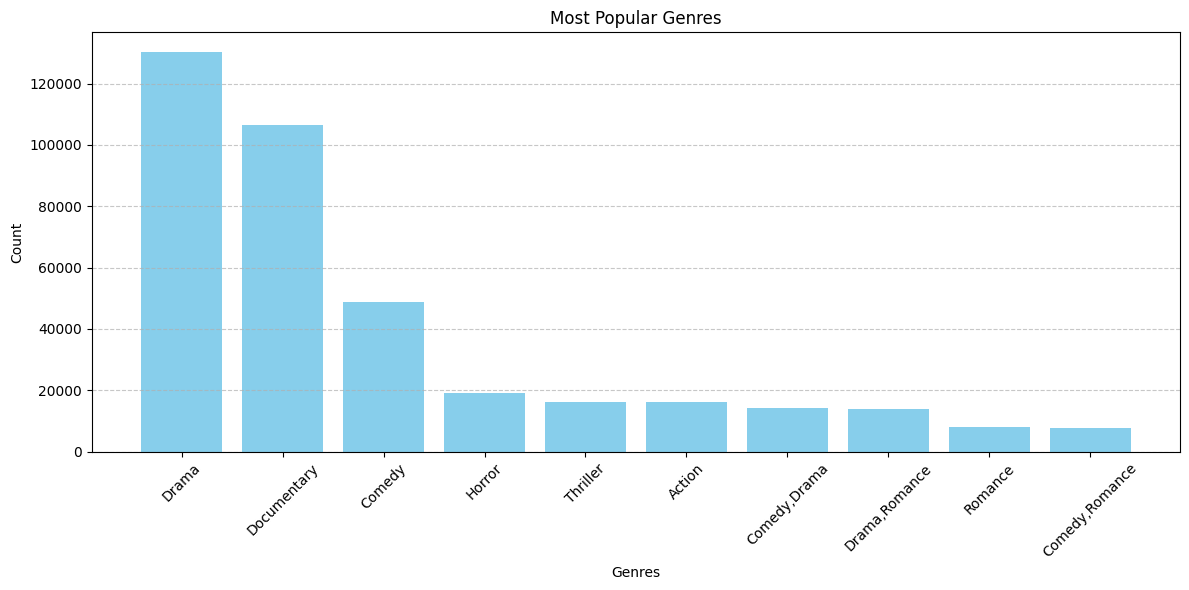

In [34]:
# most common genres in imdb movies
genre_counts = df_merge["genres"].value_counts().reset_index()
# Sort to find the most popular genres
most_popular_genres = genre_counts.sort_values(by='count', ascending=False)
most_popular_genres = most_popular_genres[most_popular_genres["genres"]!= '\\N']


most_popular_genres = most_popular_genres.sort_values(by='count', ascending=False).head(10)
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(most_popular_genres['genres'], most_popular_genres['count'], color='skyblue')
plt.title('Most Popular Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

## User Voting Trends
- The decade 2010-2020 received the highest number of votes, indicating strong engagement with films from this period. Following closely is 2000-2010, while earlier decades see a significant decline in votes, highlighting a shift in audience interest towards more recent releases.

C:\Users\shuto\AppData\Local\Temp\ipykernel_40016\1292343602.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = frequency_table.groupby("freq")['num_votes'].sum().reset_index().rename(columns={'num_votes': 'Total Votes'})


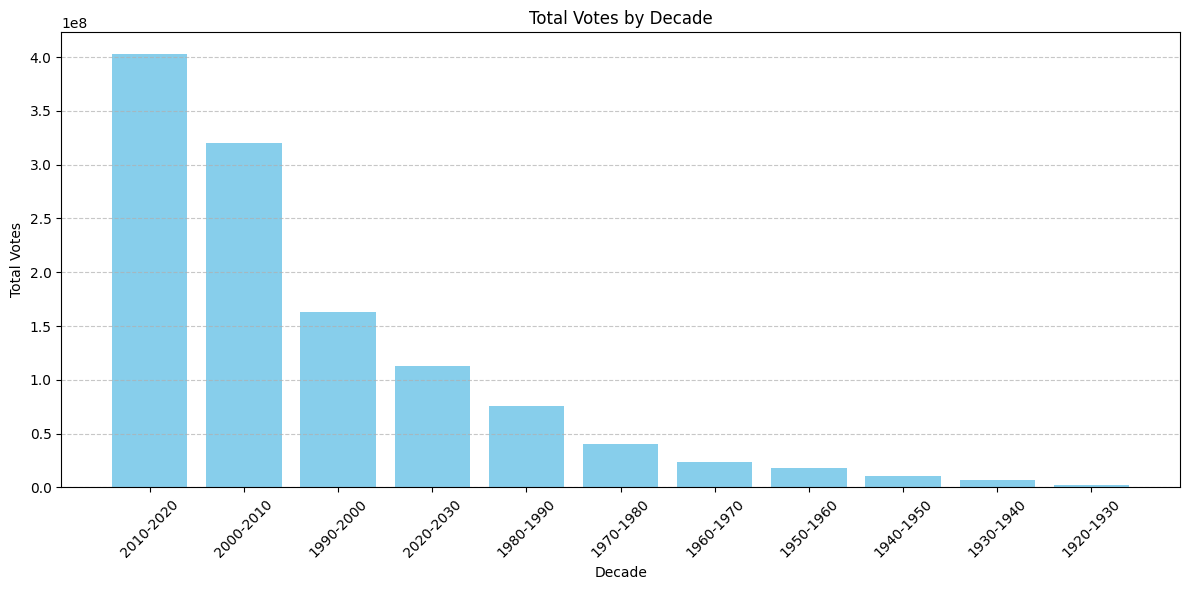

In [35]:
# Frequency table
frequency_table = df_merge.copy()

# Define custom bins for the years
bins = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]

# Define the corresponding labels for the bins
labels = ['1920-1930', '1930-1940', '1940-1950', '1950-1960', '1960-1970',
          '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020', '2020-2030']

# Create intervals
frequency_table['freq'] = pd.cut(frequency_table['year'], bins=bins, labels=labels, right=False)

# Count of each interval
freq_table = frequency_table.groupby("freq")['num_votes'].sum().reset_index().rename(columns={'num_votes': 'Total Votes'})

# Sorting descending by Total Votes
freq_table = freq_table.sort_values(['Total Votes'], ascending=False)

# Sorting descending by Total Votes
freq_table = freq_table.sort_values(['Total Votes'], ascending=False)

# create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(freq_table['freq'], freq_table['Total Votes'], color='skyblue')
plt.title('Total Votes by Decade')
plt.xlabel('Decade')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

## Movie Duration Analysis
- Select movies that have more than 50,000 votes
- Scatter Plot: Show the relationship between runtime and rating, highlighting a slight positive correlation (0.22).
    - Scatter plot demonstrates the relationship between runtime (in minutes) and average rating. A slight positive correlation (0.22) is observed, indicating that longer movies tend to receive somewhat higher ratings, though the correlation is weak.

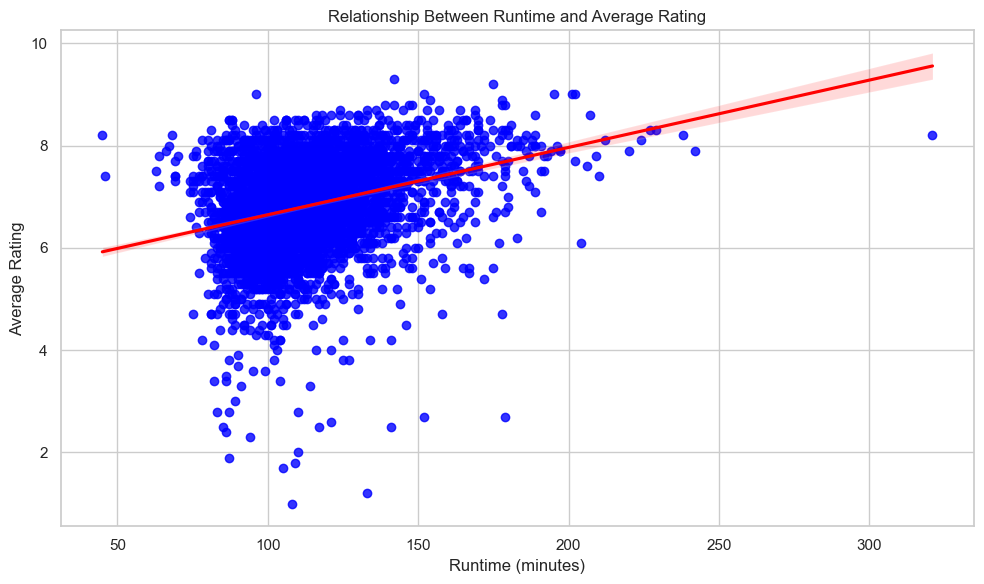

In [53]:
# top 1000 with reviews more than 50000
df_top = df_merge[df_merge['num_votes'] > 50000].sort_values(by =["average_rating", "num_votes"], ascending= False).reset_index(drop= True)
df_top['rank'] = df_top.index + 1 

# Step 1: Convert columns to numeric
df_top['runtime_minutes'] = pd.to_numeric(df_top['runtime_minutes'], errors='coerce')
df_top['average_rating'] = pd.to_numeric(df_top['average_rating'], errors='coerce')

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a scatter plot with a trend line
sns.regplot(x='runtime_minutes', y='average_rating', data=df_top, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add titles and labels
plt.title('Relationship Between Runtime and Average Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [54]:
correlation = df_top[["average_rating", "runtime_minutes"]].corr().iloc[0,1]
print(f'Correlation: {correlation:.2f}')

Correlation: 0.31
